In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of years and corresponding CSV files
years = [2015, 2016, 2017, 2018, 2019]
dfs = []

# Load each CSV file and add the 'Year' column
for year in years:
    file_path = f"../docs/data/{year}.csv"
    df = pd.read_csv(file_path)
    df['Year'] = year
    dfs.append(df)

# Combine all the dataframes into one
df_combined = pd.concat(dfs, ignore_index=True)

print(df_combined.head())
print(df_combined.describe())

  Country or region  Happiness Score  Economy (GDP per Capita)  \
0       Switzerland            7.587                   1.39651   
1           Iceland            7.561                   1.30232   
2           Denmark            7.527                   1.32548   
3            Norway            7.522                   1.45900   
4            Canada            7.427                   1.32629   

   Health (Life Expectancy)  Freedom  Generosity  Year  
0                   0.94143  0.66557     0.29678  2015  
1                   0.94784  0.62877     0.43630  2015  
2                   0.87464  0.64938     0.34139  2015  
3                   0.88521  0.66973     0.34699  2015  
4                   0.90563  0.63297     0.45811  2015  
       Happiness Score  Economy (GDP per Capita)  Health (Life Expectancy)  \
count       782.000000                782.000000                782.000000   
mean          5.379018                  0.916047                  0.612416   
std           1.127456     

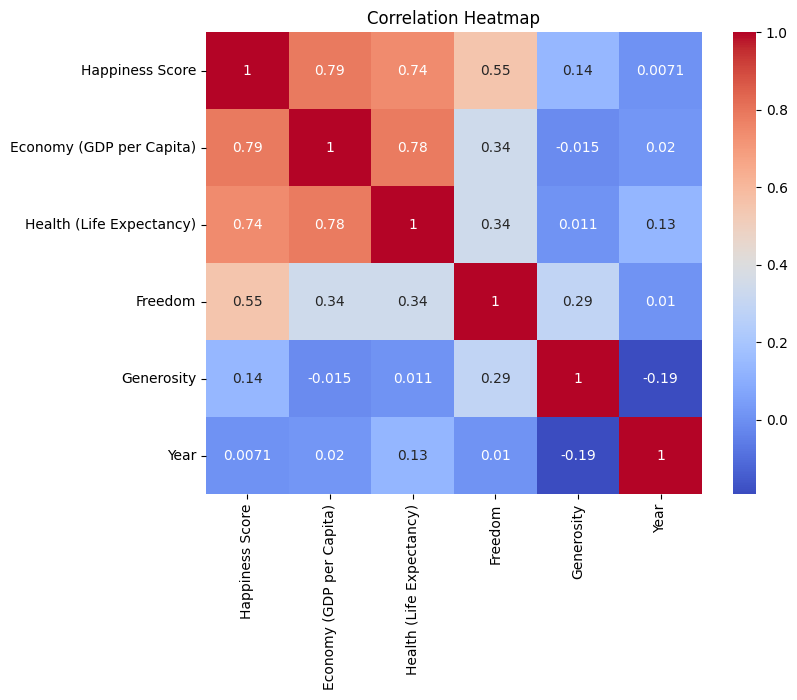

Year
2015    5.375734
2016    5.382185
2017    5.354019
2018    5.375917
2019    5.407096
Name: Happiness Score, dtype: float64


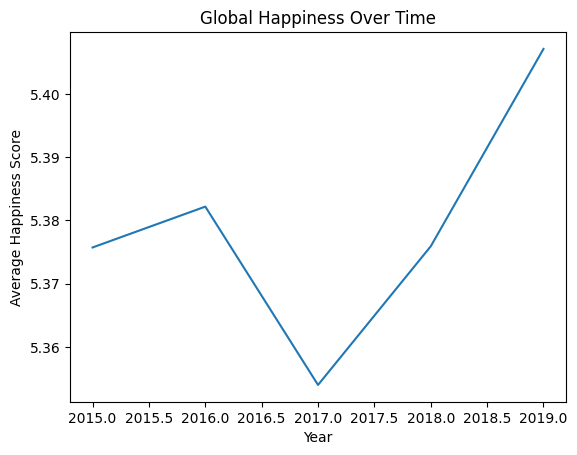

In [20]:
# For plotting, exclude the string columns (e.g., 'Country') from numeric analysis
df_numeric = df_combined.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Happiness trends over time
avg_scores = df_numeric.groupby("Year")["Happiness Score"].mean()
print(avg_scores)
avg_scores.plot(kind="line", title="Global Happiness Over Time")
# Plot the trends
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.show()